### 简介 ：本文旨在将北京大学李东风教授的《金融时间序列分析R语言》中涉及R语言的实例部分用python转写，R语言在时序分析上具有不可代替的优势，但为了对python用户友好，作者闲的没事干，写下了如下代码，一来为了自己学习金融时序相关理论，二来深觉这是一部关于金融时序的极佳教材，故也供python用户参考。数据包中原材料都是生数，向frame的转换采用了作者熟练的方式，但数据的处理远不止一种方法。实例只是理解理论的工具，希望读者更多的关注李东风教授对模型的阐述和推导。

In [1]:
import pandas as pd
from dateutil.parser import parse
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
import sympy as sp

# 1&2 金融数据与R软件

#### 该部分内容主要介绍R基础数据结构和金融数据概况，对于python用户可以参考如下书目：

##### 1.《利用python进行数据分析》
##### 2. 《python金融大数据分析》

# 3 线性时序模型

## 3.1 平稳性 : 以可口可乐为例

In [2]:
co_earns = pd.read_csv('q-ko-earns8309.txt', sep = ' ')
co_earns.columns

Index(['pends', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'anntime', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'value'],
      dtype='object')

In [3]:
co_earns = co_earns[['pends','Unnamed: 3','Unnamed: 6']]

In [4]:
co_earns['pends'] = [parse(str(i)) for i in co_earns['pends']]

In [5]:
co_earns['Unnamed: 3'] = [parse(str(i)) for i in co_earns['Unnamed: 3']]

In [6]:
co_earns.rename(columns = {'Unnamed: 3':'anntime','Unnamed: 6':'value'},inplace = True)

In [7]:
co_earns

,pends,anntime,value
0,1983-03-31,1983-04-26,0.0375
1,1983-06-30,1983-07-25,0.0492
2,1983-09-30,1983-11-02,0.0463
3,1983-12-31,1984-02-14,0.0379
4,1984-03-31,1984-04-19,0.0425
...,...,...,...
102,2008-09-30,2008-10-15,0.8300
103,2008-12-31,2009-02-12,0.6400
104,2009-03-31,2009-04-21,0.6500
105,2009-06-30,2009-07-21,0.9200


<AxesSubplot:xlabel='pends', ylabel='value'>

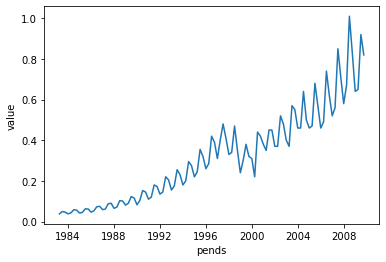

In [8]:
sns.lineplot(x = 'pends',  y = 'value', data = co_earns)

## 3.2 相关函数和自相关函数 ： 以sp500和ibm为例

In [9]:
sp500 = pd.read_csv('m-ibmsp-2611.csv')

In [10]:
sp500['date'] = [parse(str(i)) for i in sp500['date'] ]

In [11]:
sp500['sp'] = [np.log(1+i) for i in sp500['sp']]
sp500['ibm'] = [np.log(1+i) for i in sp500['ibm']]

In [12]:
sp500

,date,ibm,sp
0,1926-01-30,-0.010435,0.022223
1,1926-02-27,-0.024781,-0.044951
2,1926-03-31,-0.122836,-0.060932
3,1926-04-30,0.085979,0.022434
4,1926-05-28,0.036266,0.007650
...,...,...,...
1024,2011-05-31,-0.005290,-0.013593
1025,2011-06-30,0.015390,-0.018427
1026,2011-07-29,0.058308,-0.021708
1027,2011-08-31,-0.051858,-0.058467


<AxesSubplot:xlabel='date', ylabel='sp'>

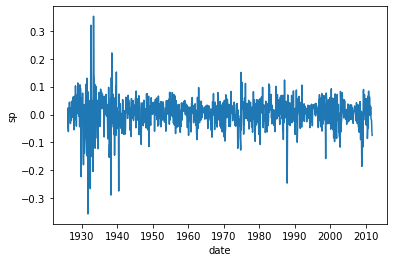

In [13]:
sns.lineplot(x = 'date',  y = 'sp', data = sp500)

array([[<AxesSubplot:xlabel='sp', ylabel='sp'>,
        <AxesSubplot:xlabel='ibm', ylabel='sp'>],
       [<AxesSubplot:xlabel='sp', ylabel='ibm'>,
        <AxesSubplot:xlabel='ibm', ylabel='ibm'>]], dtype=object)

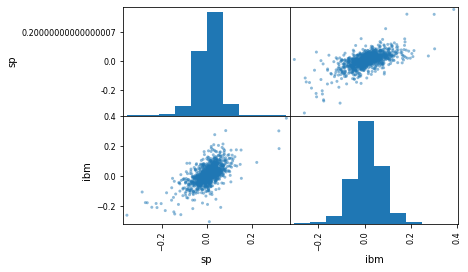

In [14]:
scatter_matrix(sp500[['sp','ibm']])

In [15]:
sp500['sp'].cov(sp500['ibm'])

0.002469737641984257

In [16]:
sp500.sp.corr(sp500.ibm)

0.6409641827645327

In [17]:
stats.spearmanr(sp500.ibm,sp500.sp)

SpearmanrResult(correlation=0.6065788974589758, pvalue=2.0070145541863243e-104)

In [18]:
sp500[['sp','ibm']].corr(method = 'kendall')

,sp,ibm
sp,1.000000,0.432807
ibm,0.432807,1.000000


In [19]:
CRSP = pd.read_csv('m-dec12910.txt', sep = ' ')
CRSP

,date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,dec1,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,dec2,Unnamed: 13,Unnamed: 14,Unnamed: 15,dec9,Unnamed: 17,Unnamed: 18,Unnamed: 19,dec10
0,19670131,0.068568,0.080373,0.180843,0.211806,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19670228,0.008735,0.011044,0.048767,0.064911,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19670331,0.039698,0.035364,0.067494,0.068904,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19670428,0.044030,0.037541,0.040785,0.044602,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19670531,-0.050631,-0.036233,-0.002191,0.000295,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,20090831,0.029726,0.035835,0.044097,0.081239,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,20090930,0.031177,0.049051,0.074140,0.069305,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,20091030,-0.012101,-0.038530,-0.080076,-0.074620,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,20091130,0.063006,0.051560,0.014429,0.010572,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
CRSP = CRSP[['date','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4']].rename(columns = {'Unnamed: 1':'dec1','Unnamed: 2':'dec2','Unnamed: 3':'dec9','Unnamed: 4':'dec10'})

In [21]:
CRSP['date'] = [parse(str(i)) for i in CRSP['date']]

In [22]:
CRSP

,date,dec1,dec2,dec9,dec10
0,1967-01-31,0.068568,0.080373,0.180843,0.211806
1,1967-02-28,0.008735,0.011044,0.048767,0.064911
2,1967-03-31,0.039698,0.035364,0.067494,0.068904
3,1967-04-28,0.044030,0.037541,0.040785,0.044602
4,1967-05-31,-0.050631,-0.036233,-0.002191,0.000295
...,...,...,...,...,...
511,2009-08-31,0.029726,0.035835,0.044097,0.081239
512,2009-09-30,0.031177,0.049051,0.074140,0.069305
513,2009-10-30,-0.012101,-0.038530,-0.080076,-0.074620
514,2009-11-30,0.063006,0.051560,0.014429,0.010572


<AxesSubplot:xlabel='date', ylabel='dec10'>

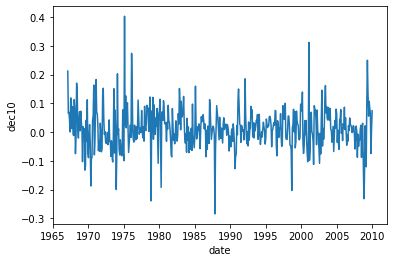

In [23]:
sns.lineplot(x = 'date', y = "dec10", data = CRSP)

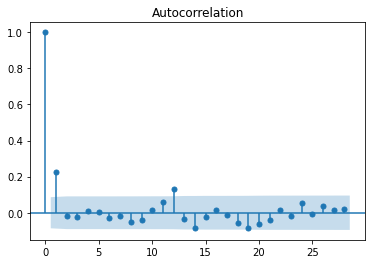

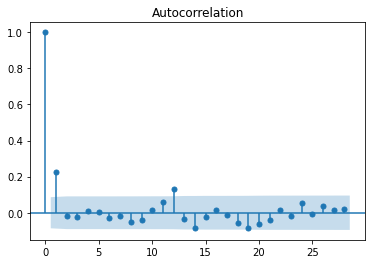

In [24]:
plot_acf(CRSP['dec10'])

In [25]:
acf_value = acf(CRSP['dec10'],nlags = 12)

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [26]:
len(CRSP['dec10'])**0.5*acf_value[12]

2.962369485509006

In [27]:
ibm_sp = pd.read_csv('m-ibmsp-2611.csv')
ibm_sp

,date,ibm,sp
0,19260130,-0.010381,0.022472
1,19260227,-0.024476,-0.043956
2,19260331,-0.115591,-0.059113
3,19260430,0.089783,0.022688
4,19260528,0.036932,0.007679
...,...,...,...
1024,20110531,-0.005276,-0.013501
1025,20110630,0.015509,-0.018258
1026,20110729,0.060041,-0.021474
1027,20110831,-0.050536,-0.056791


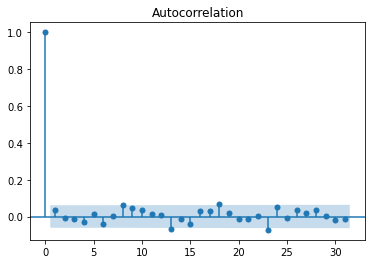

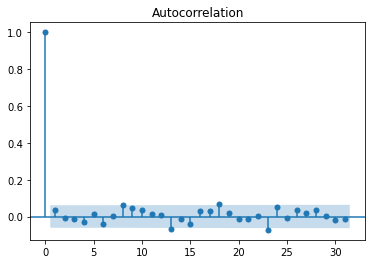

In [28]:
plot_acf(ibm_sp['ibm'])

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

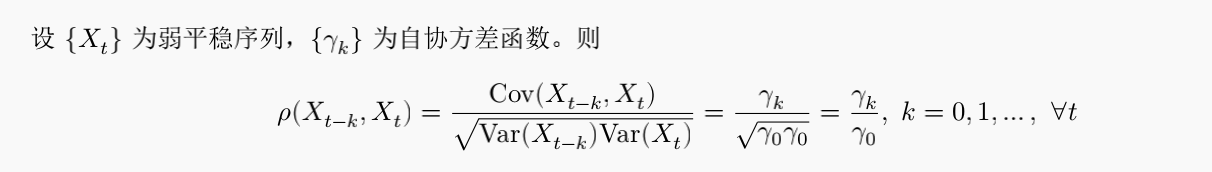

###### {Xt} 独立切期望方差不随时间改变就是白噪声

In [30]:
re = lb_test(ibm_sp['ibm'], lags=24)
print(re)

(array([ 1.45605485,  1.53360007,  1.80352781,  2.7697855 ,  3.01456099,
        4.82733728,  4.83821065,  8.97312668, 11.39275884, 12.82969205,
       12.975211  , 13.09798439, 17.823877  , 17.96319826, 19.53751959,
       20.54676283, 21.4696585 , 26.01237783, 26.42298949, 26.60093334,
       26.77837864, 26.78421206, 32.36171692, 35.38412711]), array([0.22755888, 0.46449707, 0.61416755, 0.59705945, 0.69774083,
       0.56614168, 0.67969949, 0.34456803, 0.2497447 , 0.23335045,
       0.2949487 , 0.36195919, 0.16432197, 0.20846212, 0.19040066,
       0.19659736, 0.20598384, 0.09947523, 0.11882798, 0.14686933,
       0.1783098 , 0.21953718, 0.09285159, 0.06290464]))


/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [31]:
re1 = lb_test(np.log(ibm_sp['ibm']+1), lags=24,boxpierce= False)
re1

(array([ 1.8420058 ,  1.84413961,  2.00403502,  2.79207216,  3.13604753,
         4.91184196,  4.96617647,  8.61184588, 10.7846976 , 12.25456027,
        12.64945986, 12.81436599, 16.83466994, 16.94942236, 18.72522673,
        19.90309421, 21.11221613, 25.76757322, 26.33228961, 26.62899017,
        26.85006364, 26.85008263, 31.97116696, 34.5057981 ]),
 array([0.17471604, 0.39769504, 0.57156964, 0.59320197, 0.67902052,
        0.55516887, 0.66409103, 0.37608994, 0.29075606, 0.26838097,
        0.31685243, 0.38267658, 0.20697268, 0.25888318, 0.22645638,
        0.224617  , 0.221311  , 0.10519229, 0.12119327, 0.14602844,
        0.17587136, 0.21697592, 0.10074452, 0.07607273]))

In [32]:
ibm_sp['ibm']

0      -0.010381
1      -0.024476
2      -0.115591
3       0.089783
4       0.036932
          ...   
1024   -0.005276
1025    0.015509
1026    0.060041
1027   -0.050536
1028    0.017218
Name: ibm, Length: 1029, dtype: float64

# 4 自回归模型

## 4.1 AR(1) & AR(2)的性质： 以GNP为例

In [34]:
GNP_adj = pd.read_csv("q-gnp4710.txt", sep = ' ')
GNP_adj_clean = GNP_adj.reset_index().rename(columns = {'level_0' : 'Year',"level_1" : 'Month', 'Year' : 'Date'}, inplace = False)

GNP_adj_clean['VALUE'] = pd.concat([GNP_adj_clean.VALUE.dropna(),
          GNP_adj_clean['Unnamed: 3'].dropna(),
          GNP_adj_clean.Dat.dropna()])

GNP_adj_clean

,Year,Month,Date,Mon,Dat,Unnamed: 3,VALUE
0,1947,1,1,NaN,NaN,NaN,238.1
1,1947,4,1,NaN,NaN,NaN,241.5
2,1947,7,1,NaN,NaN,NaN,245.6
3,1947,10,1,NaN,NaN,NaN,255.6
4,1948,1,1,NaN,NaN,NaN,261.7
...,...,...,...,...,...,...,...
248,2009,1,1,NaN,14172.2,NaN,14172.2
249,2009,4,1,NaN,14164.2,NaN,14164.2
250,2009,7,1,NaN,14281.9,NaN,14281.9
251,2009,10,1,NaN,14442.8,NaN,14442.8


In [35]:
GNP_adj_clean = GNP_adj_clean[['Year','Month','Date','VALUE']]
GNP_adj_clean.VALUE = np.log(GNP_adj_clean.VALUE)

/Users/runboye/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='Year', ylabel='VALUE'>

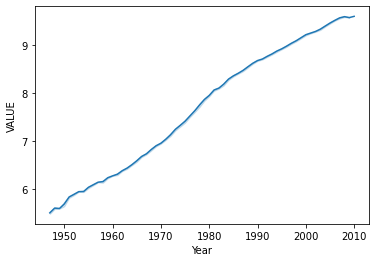

In [36]:
sns.lineplot(x= 'Year', y = 'VALUE', data = GNP_adj_clean)

In [37]:
GNP_adj_clean['Value_diff1'] = GNP_adj_clean.VALUE.diff(periods = 1)

/Users/runboye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year', ylabel='Value_diff1'>

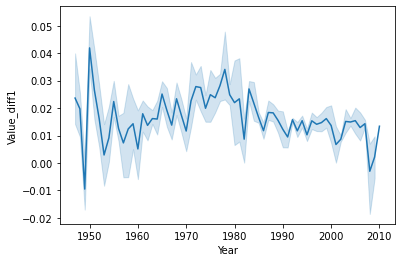

In [38]:
sns.lineplot(x= 'Year', y = 'Value_diff1', data = GNP_adj_clean)

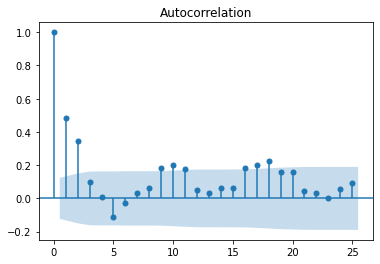

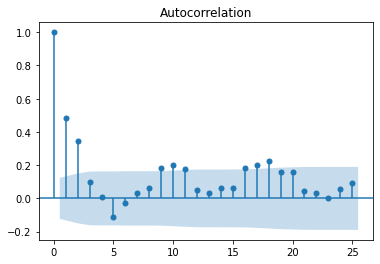

In [39]:
plot_acf(GNP_adj_clean['Value_diff1'].dropna())

## 4.2 偏自相关函数 ：以CRSP和GNP为例

In [40]:
data = []
with open('m-ibm3dx2608.txt','r') as f:
    for line in f.readlines():
        line = line.strip('\n')
        line = line.split()
        data.append(line)
ibm_pacf = pd.DataFrame(data[1:])
ibm_pacf.columns = data[0]
ibm_pacf

,date,ibmrtn,vwrtn,ewrtn,sprtn
0,19260130,-0.010381,0.000724,0.023174,0.022472
1,19260227,-0.024476,-0.033374,-0.053510,-0.043956
2,19260331,-0.115591,-0.064341,-0.096824,-0.059113
3,19260430,0.089783,0.038358,0.032946,0.022688
4,19260528,0.036932,0.012172,0.001035,0.007679
...,...,...,...,...,...
991,20080829,-0.044929,0.011042,0.014066,0.012191
992,20080930,-0.039185,-0.098060,-0.120888,-0.090791
993,20081031,-0.205113,-0.184726,-0.206004,-0.169425
994,20081128,-0.116919,-0.085206,-0.136597,-0.074849


In [41]:
ibm_pacf['date'] = [parse(i) for i in ibm_pacf['date']]

In [42]:
ibm_pacf[['ibmrtn','vwrtn','ewrtn', 'sprtn']] = ibm_pacf[['ibmrtn','vwrtn','ewrtn', 'sprtn']].astype(float)

<AxesSubplot:xlabel='date', ylabel='vwrtn'>

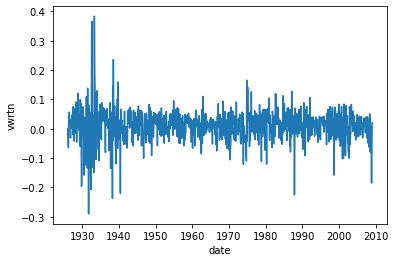

In [43]:
sns.lineplot(x = 'date', y = 'vwrtn', data = ibm_pacf) # 图4.2

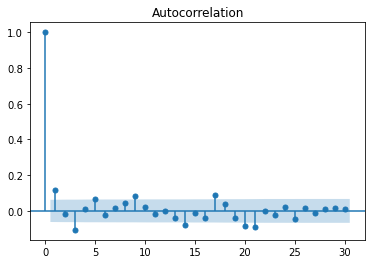

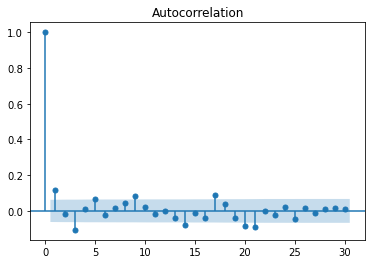

In [44]:
plot_acf(ibm_pacf['vwrtn']) # 图4.3

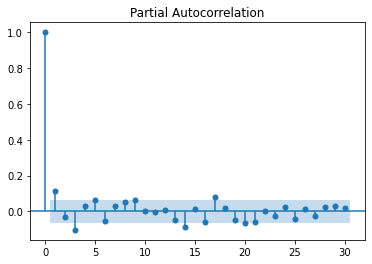

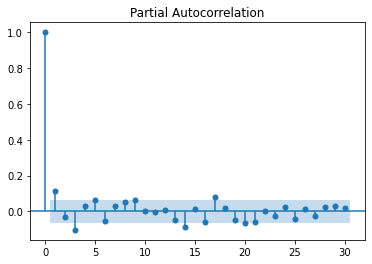

In [45]:
plot_pacf(ibm_pacf['vwrtn']) # 图4.4

#### 截尾现象：
（1）在最初的d阶明显大于2倍标准差范围
（2）之后几乎95%的(偏)自相关系数都落在2倍标准差范围以内
（3）且由非零自相关系数衰减为在零附近小值波动的过程非常突然
#### 拖尾现象：
（1）如果有超过5%的样本(偏)自相关系数都落入2倍标准差范围之外
（2）或者是由显著非0的(偏)自相关系数衰减为小值波动的过程比较缓慢或非常连续

In [46]:
pacf(ibm_pacf['vwrtn'], nlags = 12) 

array([ 1.        ,  0.11551198, -0.03042422, -0.10276765,  0.03269567,
        0.06215152, -0.05053364,  0.03142423,  0.05209912,  0.0640349 ,
        0.00539819, -0.00521495,  0.01105037])

#### PACF的计算
（1）Xi与Xi-1……Xi-k+1拟合得到残差序列
（2）Xi-k与Xi-1……Xi-k+1拟合得到残差序列
（3）计算残差序列相关系数，k>p,PACF趋于0，大于最佳滞后项后，出现截尾。PACF的意义是剔除Xi-1……Xi-k+1短滞后期的影响

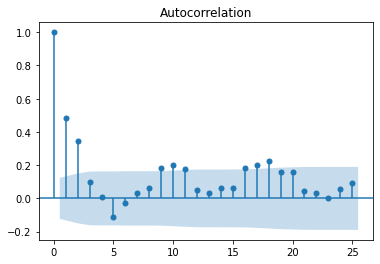

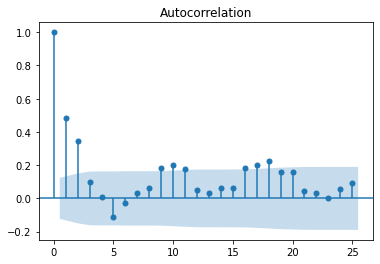

In [47]:
plot_acf(GNP_adj_clean['Value_diff1'].dropna()) # GNP数据ACF明显不截尾，拖尾

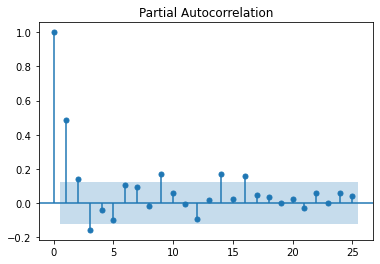

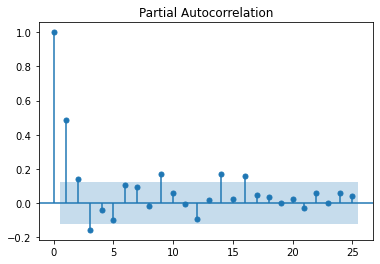

In [48]:
plot_pacf(GNP_adj_clean['Value_diff1'].dropna()) # k =3 出现截尾

##### 例1: 建立AR(p)模型，ADF（Augmented Dickey-Fuller Test)定阶 ： 以 GNP growth为例

In [49]:
adfuller(
    GNP_adj_clean['Value_diff1'].dropna(),
    maxlag = 10,
    regression = 'c',
    autolag = 'AIC',
    store = False,
    regresults = False
)

(-3.3612912376756374,
 0.012351392233122734,
 8,
 243,
 {'1%': -3.4575505077947746,
  '5%': -2.8735087323013526,
  '10%': -2.573148434859185},
 -1555.6878048011768)

In [50]:
adfuller(
    GNP_adj_clean['Value_diff1'].dropna(),
    maxlag = 12,
    regression = 'c',
    autolag = 'BIC',
    store = False,
    regresults = False
)

(-6.893043342734756,
 1.34039286261245e-09,
 1,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 -1537.8441494635576)

In [51]:
ibm_pacf['vwrtn']

0      0.000724
1     -0.033374
2     -0.064341
3      0.038358
4      0.012172
         ...   
991    0.011042
992   -0.098060
993   -0.184726
994   -0.085206
995    0.021482
Name: vwrtn, Length: 996, dtype: float64

####  例2: 对CRSP 价值加权指数月度收益率用 AR(3) 建模

##### AIC定阶

In [52]:
adfuller(
    ibm_pacf['vwrtn'],
    maxlag = 10,
    regression = 'c',
    autolag = 'AIC',
    store = False,
    regresults = False
)

(-8.952147857000371,
 8.66567424347515e-15,
 8,
 987,
 {'1%': -3.4369927443074353,
  '5%': -2.864472756705845,
  '10%': -2.568331546097238},
 -2957.181166995527)

In [53]:
from statsmodels.tsa.ar_model import ar_select_order
ar_select = ar_select_order(ibm_pacf['vwrtn'], maxlag = 20, ic = "aic")
aic = {}
for k, v in ar_select.aic.items():
    if k != 0:
        aic[max(k)] = v
aic_frame = pd.DataFrame(sorted(aic.items(), key = lambda item: item[1]))

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [54]:
aic_frame

,0,1
0,20,-5.838190
1,17,-5.837705
2,19,-5.836397
3,18,-5.836148
4,9,-5.834738
5,14,-5.834418
6,16,-5.833408
7,6,-5.832797
8,10,-5.832720
9,15,-5.832475


In [55]:
from statsmodels.tsa.ar_model import AutoReg

#### 计算滞后算子特征根判断弱平稳 {弱平稳} + {k阶自相关系数 = 0 } = 白噪声
AR模型参数估计：最大似然估计
AR模型检验： （1）模型R方（2）滞后算子特征根：单位圆外，证明时间序列弱平稳（3）残差是否为白噪声（4）滞后项系数显著性

In [56]:
AR3_model = AutoReg(ibm_pacf['vwrtn'], 3).fit()
x = sp.Symbol('x')
f = AR3_model.params[3]*x**3 + AR3_model.params[2]*x**2 + AR3_model.params[1]*x - 1
x = sp.solve(f)
x = [abs(i) for i in x]
x

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


[2.36316956691306, 2.01448981151194, 2.01448981151194]

In [57]:
AR3_model.params[1:4]
AR3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  vwrtn   No. Observations:                  996
Model:                     AutoReg(3)   Log Likelihood                1495.982
Method:               Conditional MLE   S.D. of innovations              0.054
Date:                Sun, 31 Jul 2022   AIC                             -5.841
Time:                        01:00:59   BIC                             -5.816
Sample:                             3   HQIC                            -5.831
                                  996                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0091      0.002      5.176      0.000       0.006       0.013
vwrtn.L1       0.1148      0.032      3.641      0.000       0.053       0.177
vwrtn.L2      -0.0188      0.032     -0.591      0.555      -0.081       0.044
vwrtn.L3      -0.1043      0.032     -3.283      0.001      -0.167      -0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0916           -1.6931j            2.0145           -0.1589
AR.2            1.0916           +1.6931j            2.0145            0.1589
AR.3           -2.3632           -0.0000j            2.3632           -0.5000
-----------------------------------------------------------------------------
"""

In [58]:
predict = AR3_model.predict()
residual = predict[3:] - ibm_pacf['vwrtn'][3:]
residual.values

array([-3.60667251e-02,  6.04797059e-03, -4.03727138e-02, -1.69327940e-02,
       -1.80163841e-02, -3.34303848e-06,  3.73863050e-02, -2.50226984e-02,
       -1.82059326e-02,  1.38999863e-02, -3.99703754e-02,  4.94059918e-03,
        2.19653355e-03, -5.19525900e-02,  3.52634755e-02, -7.06305457e-02,
       -1.47902758e-02, -3.60861010e-02,  4.82546807e-02, -6.81075200e-02,
       -1.09690557e-02,  1.84654588e-02,  1.55317910e-02, -8.58324164e-02,
       -2.29620387e-02, -4.50352102e-03,  4.62844569e-02, -1.09972962e-02,
       -6.03885064e-02, -9.78612716e-03, -8.41861909e-03, -1.17848105e-01,
        1.41610979e-02, -4.66027039e-02,  2.55466156e-03,  1.55512598e-02,
       -1.40019139e-02,  7.03341067e-02, -9.67924946e-02, -2.54188925e-02,
       -6.69509895e-02,  5.77220374e-02,  1.92550796e-01,  1.01962311e-01,
       -1.41165759e-02, -2.27495230e-02,  4.47107804e-04, -6.56549689e-02,
        3.22022532e-02,  1.56860066e-02,  1.58048233e-01, -4.62315782e-02,
        1.39061493e-02,  

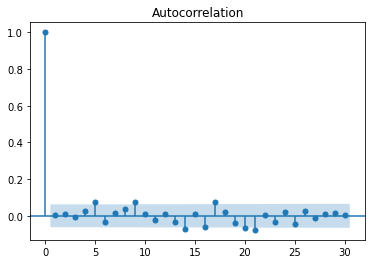

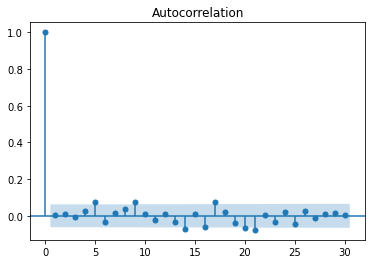

In [59]:
plot_acf(residual) ## ACF来看残差是白噪声

In [60]:
re_AR3 = lb_test(residual, lags=12)

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [61]:
re_AR3 # 不拒绝原假设，残差白噪声

(array([ 0.01694523,  0.07743335,  0.11167203,  0.79079392,  6.65691357,
         7.95957144,  8.26376691,  9.70387264, 15.74961572, 15.88258045,
        16.44939923, 16.56678056]),
 array([0.8964289 , 0.96202324, 0.99040086, 0.93967799, 0.24743165,
        0.2410802 , 0.30991093, 0.28642834, 0.07229797, 0.10304337,
        0.12524997, 0.16663288]))

# 5 移动平均模型
MA模型ACF定阶， AR模型PACF定阶

In [62]:
data = []
with open('m-ibm3dx2608.txt','r') as f:
    for line in f.readlines():
        line = line.strip('\n')
        line = line.split()
        data.append(line)
ibm_pacf = pd.DataFrame(data[1:])
ibm_pacf.columns = data[0]
ibm_pacf
ibm_pacf['date'] = [parse(i) for i in ibm_pacf['date']]
ibm_pacf[['ibmrtn','vwrtn','ewrtn', 'sprtn']] = ibm_pacf[['ibmrtn','vwrtn','ewrtn', 'sprtn']].astype(float)

<AxesSubplot:xlabel='date', ylabel='ewrtn'>

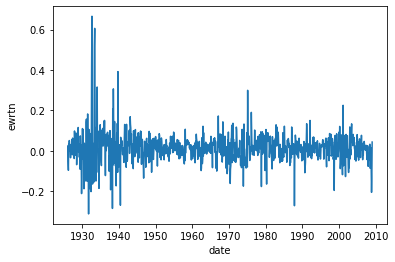

In [63]:
sns.lineplot(x = 'date', y = 'ewrtn', data = ibm_pacf)

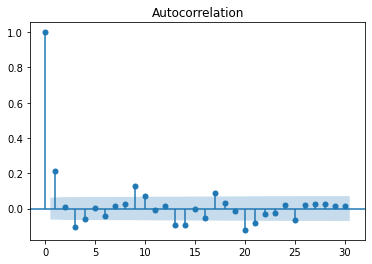

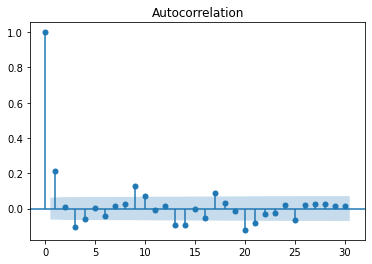

In [64]:
plot_acf(ibm_pacf['ewrtn'])

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [66]:
MA = ARIMA(ibm_pacf['ewrtn'],order=(0,0,9))
MA_result = MA.fit(disp = -1)
MA_result.summary()

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  ewrtn   No. Observations:                  996
Model:                     ARMA(0, 9)   Log Likelihood                1220.859
Method:                       css-mle   S.D. of innovations              0.071
Date:                Sun, 31 Jul 2022   AIC                          -2419.718
Time:                        01:01:01   BIC                          -2365.777
Sample:                             0   HQIC                         -2399.212
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0122      0.003      4.388      0.000       0.007       0.018
ma.L1.ewrtn     0.2144      0.032      6.787      0.000       0.152       0.276
ma.L2.ewrtn     0.0374      0.032      1.166      0.244      -0.025       0.100
ma.L3.ewrtn    -0.1203      0.033     -3.663      0.000      -0.185      -0.056
ma.L4.ewrtn    -0.0424      0.034     -1.263      0.207      -0.108       0.023
ma.L5.ewrtn     0.0232      0.032      0.727      0.467      -0.039       0.086
ma.L6.ewrtn    -0.0302      0.032     -0.951      0.342      -0.092       0.032
ma.L7.ewrtn     0.0482      0.036      1.323      0.186      -0.023       0.120
ma.L8.ewrtn    -0.0276      0.035     -0.779      0.436      -0.097       0.042
ma.L9.ewrtn     0.1350      0.032      4.181      0.000       0.072       0.198
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1682           -0.0000j            1.1682           -0.5000
MA.2           -0.8781           -0.8217j            1.2026           -0.3803
MA.3           -0.8781           +0.8217j            1.2026            0.3803
MA.4           -0.2609           -1.2146j            1.2423           -0.2837
MA.5           -0.2609           +1.2146j            1.2423            0.2837
MA.6            1.2018           -0.4212j            1.2734           -0.0537
MA.7            1.2018           +0.4212j            1.2734            0.0537
MA.8            0.6235           -1.1674j            1.3235           -0.1719
MA.9            0.6235           +1.1674j            1.3235            0.1719
-----------------------------------------------------------------------------
"""

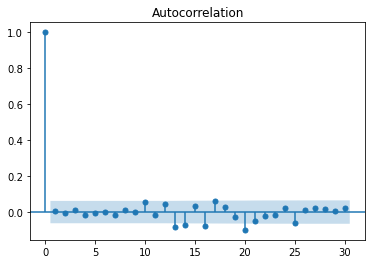

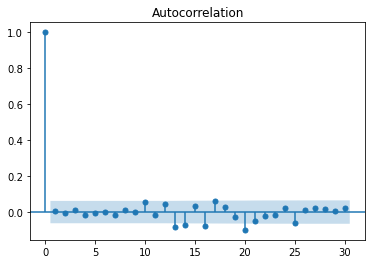

In [67]:
MA_residual = ibm_pacf['ewrtn'] - MA_result.predict()
plot_acf(MA_residual)

In [68]:
lb_test(MA_residual, lags = 12)

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([0.03614273, 0.05464852, 0.20149321, 0.39506341, 0.40168792,
        0.40171935, 0.65568869, 0.7971393 , 0.79717991, 3.84023161,
        4.15756281, 6.09106372]),
 array([0.84922104, 0.97304567, 0.97734788, 0.98287908, 0.99528297,
        0.99883739, 0.99865352, 0.99923393, 0.99977987, 0.95426669,
        0.96507904, 0.9114221 ]))

# 6 ARMA模型

In [69]:
data = []
with open('m-3m4608.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip('\n')
        line = line.split()
        data.append(line)
TM = pd.DataFrame(data[1:])
TM.columns = data[0]
TM['date'] = [parse(i) for i in TM['date']]
TM['rtn'] = TM['rtn'].astype(float)
TM['rtn'] = [np.log(1+i) for i in TM['rtn']]
TM

,date,rtn
0,1946-02-28,-0.081125
1,1946-03-30,0.018421
2,1946-04-30,-0.105361
3,1946-05-31,0.190519
4,1946-06-28,0.005115
...,...,...
750,2008-08-29,0.024003
751,2008-09-30,-0.047039
752,2008-10-31,-0.060497
753,2008-11-28,0.047530


<AxesSubplot:xlabel='date', ylabel='rtn'>

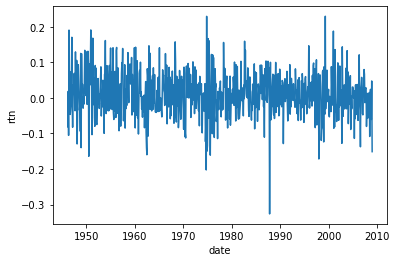

In [70]:
sns.lineplot(y = 'rtn', x = 'date' , data = TM)

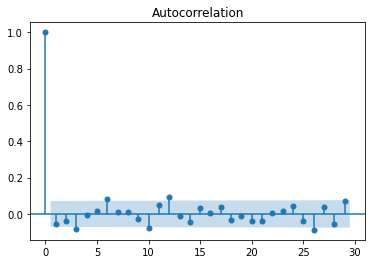

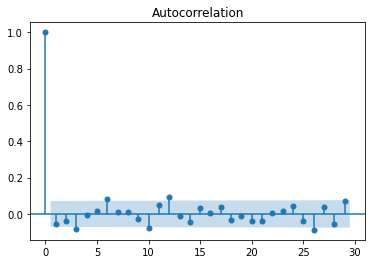

In [71]:
plot_acf(TM['rtn'])

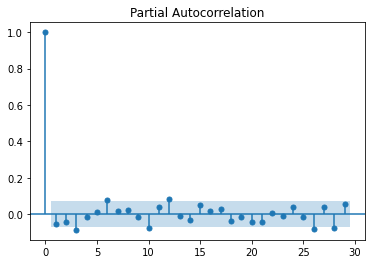

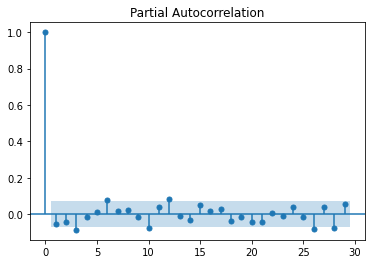

In [72]:
plot_pacf(TM['rtn'])

In [73]:
import itertools
p_min = 1
q_min = 1
p_max = 6
q_max = 6

results_bic = pd.DataFrame(index = ['AR{}'.format(i) for i in range(p_min,p_max+1)],
                          columns = ['MA{}'.format(i) for i in range(q_min, q_max+1)])

In [74]:
for p ,q in itertools.product(range(p_min,p_max+1),
                               range(q_min,q_max+1)):
    if p==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    try:
        model = ARIMA(TM['rtn'], order=(p, 0, q))
        results = model.fit(disp = -1)
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_par

In [75]:
results_bic

,MA1,MA2,MA3,MA4,MA5,MA6
AR1,-1995.002112,-1988.860769,-1984.783625,-1978.398911,-1974.154950,-1969.808924
AR2,-1988.997171,-1982.178933,-1978.160724,-1971.788224,-1967.492244,-1963.226644
AR3,-1985.786243,-1978.842752,-1984.717373,-1976.830912,-1971.191095,-1966.762145
AR4,-1979.228434,-1983.582773,-1975.902171,-1971.740508,NaN,-1962.458182
AR5,-1974.729214,-1975.640385,-1973.346340,NaN,NaN,-1958.559331
AR6,-1970.922419,-1964.298466,-1963.643666,-1964.046406,-1956.641171,-1950.013191


# 7 单位根过程

In [80]:
data = []
with open('m-3m4608.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip('\n')
        line = line.split()
        data.append(line)
TM = pd.DataFrame(data[1:])
TM.columns = data[0]
TM['date'] = [parse(i) for i in TM['date']]
TM['rtn'] = TM['rtn'].astype(float)
TM['logdiff'] = [np.log(1+i) for i in TM['rtn']]
TM

,date,rtn,logdiff
0,1946-02-28,-0.077922,-0.081125
1,1946-03-30,0.018592,0.018421
2,1946-04-30,-0.100000,-0.105361
3,1946-05-31,0.209877,0.190519
4,1946-06-28,0.005128,0.005115
...,...,...,...
750,2008-08-29,0.024293,0.024003
751,2008-09-30,-0.045950,-0.047039
752,2008-10-31,-0.058703,-0.060497
753,2008-11-28,0.048678,0.047530


In [81]:
TM['logdiff'].mean()

0.010299412024449239

In [82]:
TM['logdiff'].std()

0.063719098418256

In [87]:
lb_test(TM['logdiff'], lags = 12)

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 2.37761629,  3.47105632,  8.60082647,  8.61727331,  8.85720016,
        13.99635356, 14.04525827, 14.16804606, 14.8641601 , 19.50413457,
        21.33097102, 27.68842218]),
 array([0.12308523, 0.17630706, 0.035097  , 0.07141113, 0.11489733,
        0.02967692, 0.05038222, 0.07748915, 0.09473549, 0.03430737,
        0.03009982, 0.00614265]))

In [96]:
for i in range(0,len(TM['logdiff'])):
    if i == 0:
        TM['logpt'][i] = TM['logdiff'][i] + 0
        continue
    try:
        TM['logpt'][i] = TM['logdiff'][i] + TM['logdiff'][i-1]
    except:
        continue  
TM['logpt']

/Users/runboye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/runboye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     -0.081125
1     -0.062704
2     -0.086939
3      0.085158
4      0.195634
         ...   
750    0.035433
751   -0.023037
752   -0.107536
753   -0.012966
754   -0.103637
Name: logpt, Length: 755, dtype: float64

In [99]:
TM['cumlog'] = np.cumsum(TM['logdiff'])

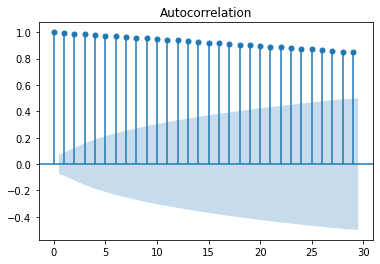

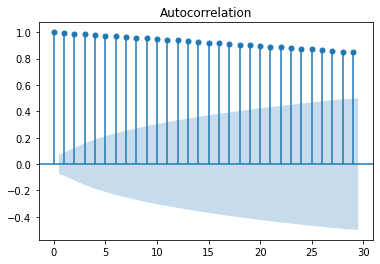

In [100]:
plot_acf(TM['cumlog'])

In [113]:
TM['Trend_line'] = [0.01030*i for i in range(0,len(TM['logdiff']))]
TM['Random_walk'] = TM['cumlog'] - TM['Trend_line']
TM

,date,rtn,logdiff,logpt,cumlog,Trend_line,Random_walk
0,1946-02-28,-0.077922,-0.081125,-0.081125,-0.081125,0.0000,-0.081125
1,1946-03-30,0.018592,0.018421,-0.062704,-0.062704,0.0103,-0.073004
2,1946-04-30,-0.100000,-0.105361,-0.086939,-0.168065,0.0206,-0.188665
3,1946-05-31,0.209877,0.190519,0.085158,0.022454,0.0309,-0.008446
4,1946-06-28,0.005128,0.005115,0.195634,0.027569,0.0412,-0.013631
...,...,...,...,...,...,...,...
750,2008-08-29,0.024293,0.024003,0.035433,7.987229,7.7250,0.262229
751,2008-09-30,-0.045950,-0.047039,-0.023037,7.940189,7.7353,0.204889
752,2008-10-31,-0.058703,-0.060497,-0.107536,7.879693,7.7456,0.134093
753,2008-11-28,0.048678,0.047530,-0.012966,7.927223,7.7559,0.171323


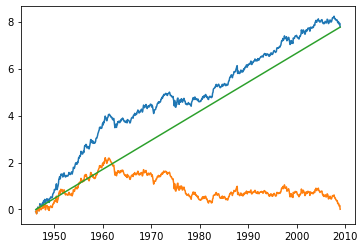

In [114]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = TM['date']
y1 = TM['cumlog']
ax.plot(x, y1, label='logpt')
y2 = TM['Random_walk']
ax.plot(x, y2, label='random_walk') 
y3 = TM['Trend_line']
ax.plot(x, y3, label='Trend_line') 

#### 以GNP为例，解释时间序列是否存在单位根，以及利用差分转换为无单位根过程

In [148]:
data = []
with open('q-gnp4710.txt','r') as f:
    for line in f.readlines():
        data.append(line.split())
GNP_frame = pd.DataFrame(data[1:])
GNP_frame.columns = data[0]
GNP_frame['YDM'] = GNP_frame['Year'].astype(str) + GNP_frame['Mon'].astype(str) + GNP_frame['Dat'].astype(str)
GNP_frame = GNP_frame[['YDM','VALUE']]
GNP_frame['YDM'] = [parse(i) for i in GNP_frame['YDM']]
GNP_frame['VALUE'] = GNP_frame['VALUE'].astype(float)
GNP_frame['log_value'] = [np.log(float(i)) for i in GNP_frame['VALUE']]
GNP_frame['diff_log_value'] = GNP_frame['log_value'].diff()

<AxesSubplot:xlabel='YDM', ylabel='log_value'>

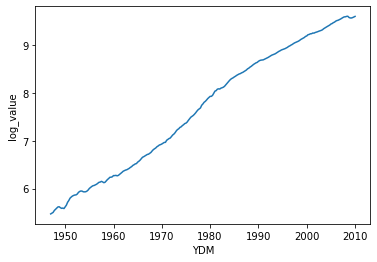

In [146]:
sns.lineplot(x = 'YDM', y = 'log_value', data = GNP_frame)

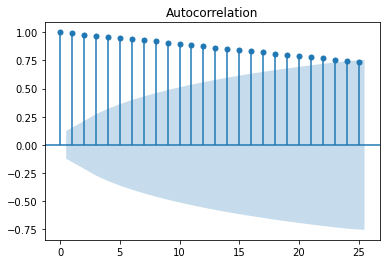

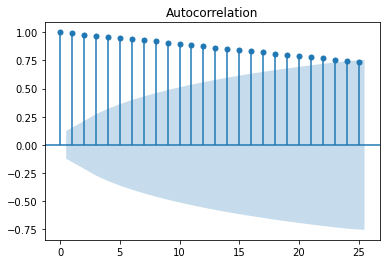

In [147]:
plot_acf(GNP_frame['log_value'])

<AxesSubplot:xlabel='YDM', ylabel='diff_log_value'>

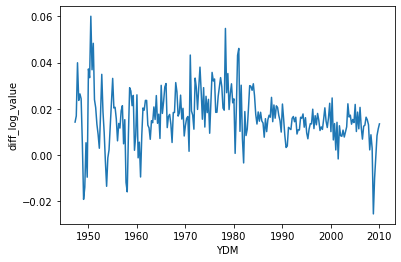

In [149]:
sns.lineplot(x = 'YDM', y = 'diff_log_value', data = GNP_frame)

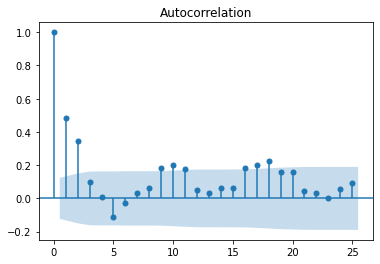

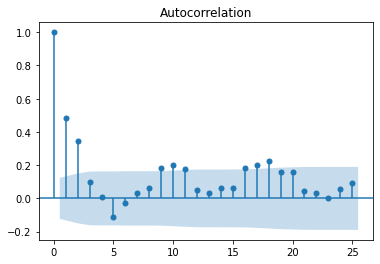

In [150]:
plot_acf(GNP_frame['diff_log_value'].dropna())

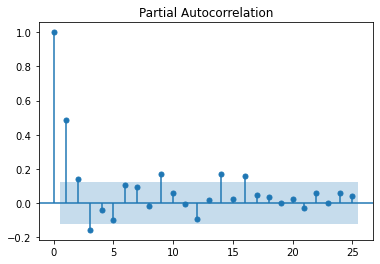

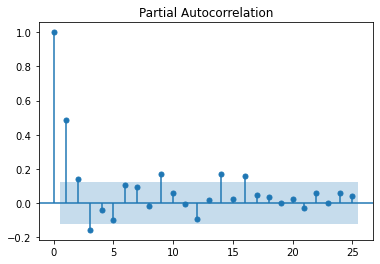

In [151]:
plot_pacf(GNP_frame['diff_log_value'].dropna())

#### p-value: 0.012拒绝原假设，无单位根， 可以对一阶差分做AR模型

In [152]:
adfuller(
    GNP_frame['diff_log_value'].dropna(),
    maxlag = 10,
    regression = 'c',
    autolag = 'AIC',
    store = False,
    regresults = False
)

(-3.3612912376756374,
 0.012351392233122734,
 8,
 243,
 {'1%': -3.4575505077947746,
  '5%': -2.8735087323013526,
  '10%': -2.573148434859185},
 -1555.6878048011768)

#### p-value: 0.35有单位根

In [178]:
adfuller(
    GNP_frame['log_value'].dropna(),
    maxlag = 10,
    regression = 'c',
    autolag = 'AIC',
    store = False,
    regresults = False
) 

(-1.846745112345675,
 0.35751320212542825,
 9,
 243,
 {'1%': -3.4575505077947746,
  '5%': -2.8735087323013526,
  '10%': -2.573148434859185},
 -1560.776418376916)

#### 以标普500为例

In [173]:
data = []
with open('d-sp55008.txt', 'r') as f:
    for line in f.readlines():
        data.append(line.split())
sp500_OHLC = pd.DataFrame(data[1:])
sp500_OHLC.columns = data[0]  
for i in range(0,len(sp500_OHLC.mon)):
    if int(sp500_OHLC['mon'][i]) < 10:
        sp500_OHLC['mon'][i] = '0' + str(sp500_OHLC['mon'][i])
for i in range(0,len(sp500_OHLC.day)):
    if int(sp500_OHLC['day'][i]) < 10:
        sp500_OHLC['day'][i] = '0' + str(sp500_OHLC['day'][i])

In [175]:
sp500_OHLC['Date'] = sp500_OHLC['year'].astype(str) + sp500_OHLC['mon'].astype(str) + sp500_OHLC['day'].astype(str)

In [177]:
sp500_OHLC['Date'] = [parse(i) for i in sp500_OHLC['Date']]

In [181]:
sp500_OHLC.drop(['year','day', 'mon'], axis = 1)

,open,high,low,close,volume,adjclose,Date
0,16.66,16.66,16.66,16.66,1260000,16.66,1950-01-03
1,16.85,16.85,16.85,16.85,1890000,16.85,1950-01-04
2,16.93,16.93,16.93,16.93,2550000,16.93,1950-01-05
3,16.98,16.98,16.98,16.98,2010000,16.98,1950-01-06
4,17.08,17.08,17.08,17.08,2520000,17.08,1950-01-09
...,...,...,...,...,...,...,...
14657,1373.69,1386.74,1369.02,1372.54,2147483648,1372.54,2008-04-07
14658,1370.16,1370.16,1360.62,1365.54,2147483648,1365.54,2008-04-08
14659,1365.50,1368.39,1349.97,1354.49,2147483648,1354.49,2008-04-09
14660,1355.37,1367.24,1350.11,1360.55,2147483648,1360.55,2008-04-10


In [184]:
sp500_OHLC['logclose'] = [np.log(i) for i in sp500_OHLC['close'].astype(float)]
sp500_OHLC['diff_logclose'] = sp500_OHLC['logclose'].diff()

<AxesSubplot:xlabel='Date', ylabel='logclose'>

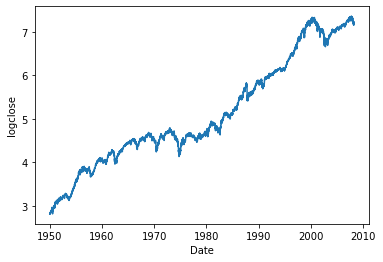

In [187]:
sns.lineplot(x = 'Date', y = 'logclose', data = sp500_OHLC)

<AxesSubplot:xlabel='Date', ylabel='diff_logclose'>

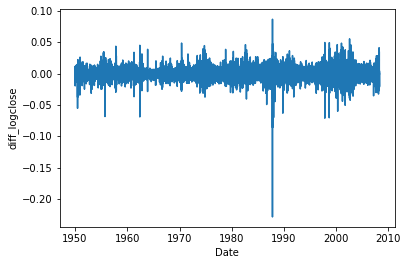

In [188]:
sns.lineplot(x = 'Date', y = 'diff_logclose', data = sp500_OHLC)

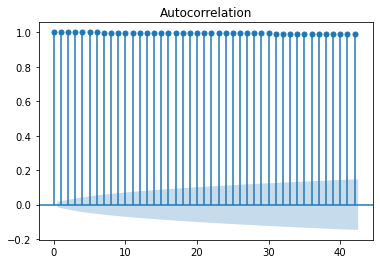

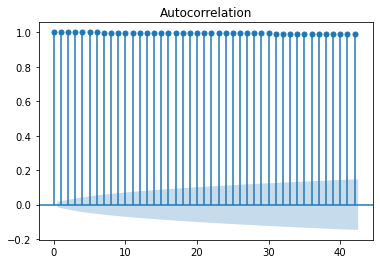

In [190]:
plot_acf(sp500_OHLC['logclose'])

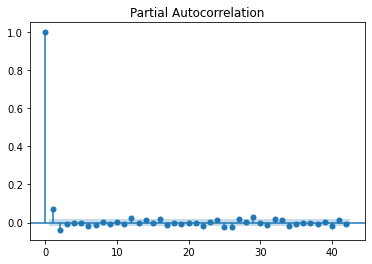

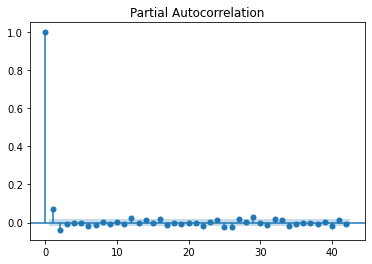

In [204]:
plot_pacf(sp500_OHLC['diff_logclose'].dropna())

In [205]:
aic_order = ar_select_order(sp500_OHLC['diff_logclose'].dropna(), maxlag = 6, ic = 'aic')
print(aic_order.aic)

{(1, 2): -9.424346047486827, (1, 2, 3): -9.42426987194355, (1, 2, 3, 4, 5, 6): -9.424206487982998, (1, 2, 3, 4): -9.424138880251565, (1, 2, 3, 4, 5): -9.424002422803808, (1,): -9.42298146144588, 0: -9.418287649511061}


/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [206]:
sp500_AR = ARIMA(sp500_OHLC['diff_logclose'].dropna(), order = (2,0,0))
result = sp500_AR.fit(disp = -1)
result.summary()

/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/runboye/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          diff_logclose   No. Observations:                14661
Model:                     ARMA(2, 0)   Log Likelihood               48286.876
Method:                       css-mle   S.D. of innovations              0.009
Date:                Sun, 31 Jul 2022   AIC                         -96565.751
Time:                        19:40:40   BIC                         -96535.379
Sample:                             0   HQIC                        -96555.663
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0003   7.68e-05      3.894      0.000       0.000       0.000
ar.L1.diff_logclose     0.0721      0.008      8.741      0.000       0.056       0.088
ar.L2.diff_logclose    -0.0387      0.008     -4.686      0.000      -0.055      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9327           -4.9984j            5.0847           -0.2206
AR.2            0.9327           +4.9984j            5.0847            0.2206
-----------------------------------------------------------------------------
"""

In [216]:
ljunbox = lb_test(sp500_OHLC['diff_logclose'].dropna(), lags = 12)